
### CPP 6102: Computational Thinking & Programming 4 Data Science - CAT 2 
#### NIcholas Barasa 024/06024
___
#### Note: This task should be supported practically, and your work must be meaningful and logically sound.

#### Use a dataset of your choice, to show the following. In each case, Support your answer with a valid explanation of the rationale of the activity.

### i. Highlight or explain what your data is about
___
Dataset - Covid19 dataset, publicly available on [kaggle](https://www.kaggle.com/datasets/imdevskp/corona-virus-report/data)

The dataset contains 49,068 records for reported COVID-19 cases worldwide, The data contains the following columns;

- **Province/State**: Sub-regions or states in a country.
- **Country/Region**: The country where the data was recorded.
- **Lat/Long**: Geographical coordinates (latitude and longitude) of the respective regions.
- **Date**: The date when the cases were reported.
- **Confirmed, Deaths, Recovered, Active**: Numerical data capturing the number of confirmed cases, deaths, recoveries, and active cases on the given date.
- **WHO Region**: Categorization of countries by WHO-defined regions.
- 

This data is useful for studying and tracking the spread and impact of COVID-19 across various regions and dates.

---


In [1]:

# import necessary libs

import pandas as pd
import matplotlib.pyplot as plt

# for a clean presentation
import warnings
warnings.filterwarnings('ignore')

# for maps
import folium


In [2]:
# Load the dataset
covid_data = pd.read_csv('covid_19_clean_complete.csv')

# Display first few rows
covid_data.head()

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [3]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB



___
### ii. Three data preparation activities

1. **Handling missing values**
2. **Data type conversion**
3. **Data filtering/selection**

---



##### 1. Handling missing values

In [4]:

# Check for missing values
missing_values = covid_data.isnull().sum()
missing_values


Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

##### We can see only Province/State contains missing values. We could decide to impute the missing values as Other or NA

In [5]:
covid_data['Province/State'].fillna('N/A', inplace=True)

In [6]:
# confirm if fill was successful
covid_data.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

##### 2. Data type conversion

In [7]:

# Convert 'Date' column to datetime
covid_data['Date'] = pd.to_datetime(covid_data['Date'])
covid_data.dtypes


Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

##### 3. Data filtering/selection

In [8]:

# Filter rows where Confirmed cases are greater than 0

atleast_1_case = covid_data[covid_data['Confirmed'] > 0]
atleast_1_case.head()


Province/State Country/Region      Lat      Long       Date  Confirmed  \
48          Anhui          China  31.8257  117.2264 2020-01-22          1   
49        Beijing          China  40.1824  116.4142 2020-01-22         14   
50      Chongqing          China  30.0572  107.8740 2020-01-22          6   
51         Fujian          China  26.0789  117.9874 2020-01-22          1   
53      Guangdong          China  23.3417  113.4244 2020-01-22         26   

    Deaths  Recovered  Active       WHO Region  
48       0          0       1  Western Pacific  
49       0          0      14  Western Pacific  
50       0          0       6  Western Pacific  
51       0          0       1  Western Pacific  
53       0          0      26  Western Pacific

___

## iii. Two data analysis activities

1. **Trend analysis** - Analyze the progression of COVID-19 cases over time for a specific region or country.
2. **Regional comparison** -  Compare COVID-19 statistics (e.g., Deaths to Confirmed ratio) across WHO regions.

___

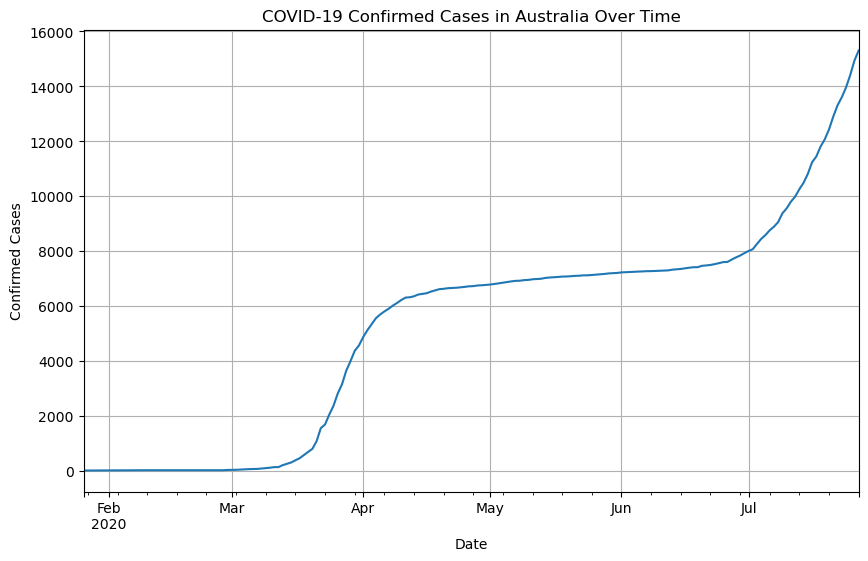

In [9]:

# Trend analysis -Confirmed cases in Australia over time
australia_data = atleast_1_case[atleast_1_case['Country/Region'] == 'Australia']
australia_trend = australia_data.groupby('Date')['Confirmed'].sum()

# Plot the trend
plt.figure(figsize=(10, 6))
australia_trend.plot()
plt.title('COVID-19 Confirmed Cases in Australia Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.grid()
plt.show()


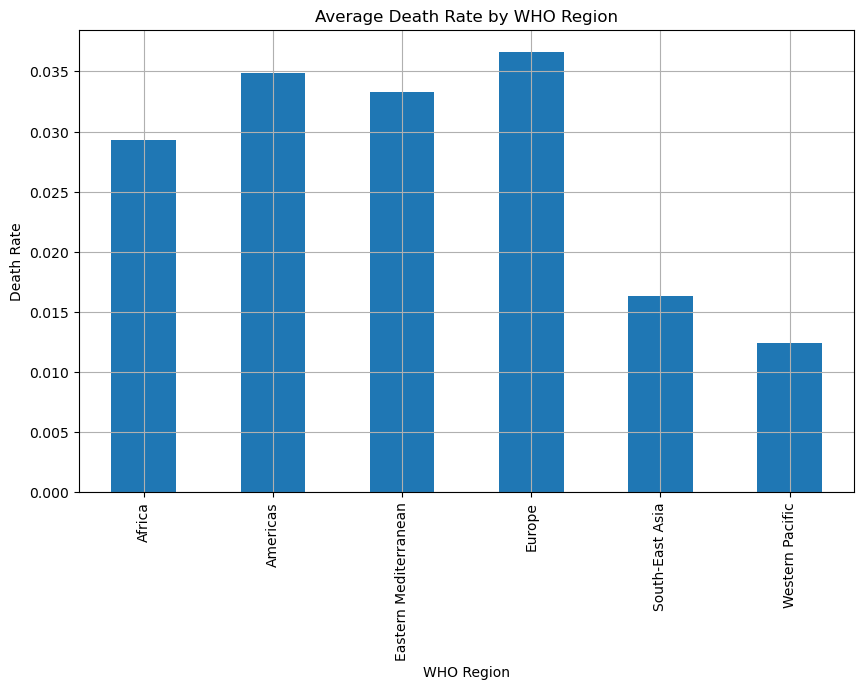

In [10]:

# Calculate death rate (Deaths/Confirmed) for each WHO Region
atleast_1_case['Death Rate'] = atleast_1_case['Deaths'] / atleast_1_case['Confirmed']
region_death_rate = atleast_1_case.groupby('WHO Region')['Death Rate'].mean()

# Plot regional death rate
region_death_rate.plot(kind='bar', figsize=(10, 6))
plt.title('Average Death Rate by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Death Rate')
plt.grid()
plt.show()

### Inference
- Europe has the highest average death rate among all WHO regions, suggesting the region experienced significant challenges in controlling fatalities during the pandemic.
- Possible factors include an aging population and higher prevalence of comorbidities.

- South-East Asia and Western Pacific have the lowest death rates. Potential reasons include swift government actions, widespread mask use, and strong public health measures

In [ ]:

# iterating through confirmed cases to create a map with regions where there was more than 1000 deaths

world_map = folium.Map(location=[0, 0], zoom_start=2)

# Add markers for regions with COVID-19 deaths
for _, row in atleast_1_case.iterrows():
    if row['Deaths'] > 1000:  # filter 
        folium.CircleMarker(
            location=[row['Lat'], row['Long']],
            radius=5,
            color='red',
            fill=True,
            fill_opacity=0.6,
            popup=f"Region: {row['Country/Region']}, Confirmed: {row['Confirmed']}"
        ).add_to(world_map)

# disply
world_map